<a href="https://colab.research.google.com/github/zabihin/Speed-Dating/blob/main/Bloc2_Speed_Dating_Zahra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

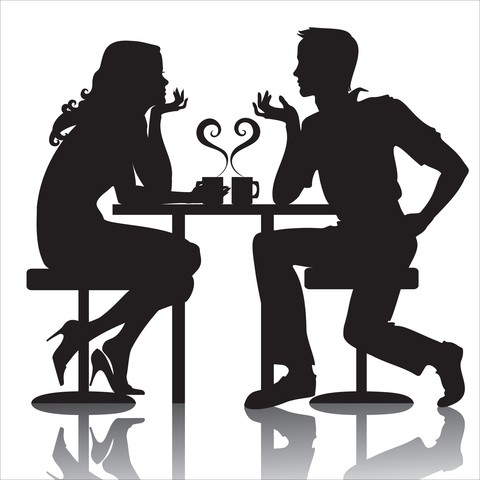












##About dataset:
Data was gathered from participants in experimental speed dating events from 2002-2004. During the events, the attendees would have a four minute "first date" with every other participant of the opposite sex. At the end of their four minutes, participants were asked if they would like to see their date again. They were also asked to rate their date on six attributes: Attractiveness, Sincerity, Intelligence, Fun, Ambition, and Shared Interests.
This is a Kaggle competition on which you can find more details here :

[Speed Dating Dataset
](https://www.kaggle.com/datasets/annavictoria/speed-dating-experiment)



Import libraries


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
# Load Dataset

data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Speed Dating Data.csv" , encoding="ISO-8859-1")
df=data.copy()

#Part I: Data Exploration 




In [ ]:
data.shape

(8378, 195)

In [ ]:
#Dataset quick look
data.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
print("The number of unique  id is",data['iid'].nunique())

The number of unique  id is 551


In [ ]:
null_data = (data.isnull().sum() / len(data)) * 100
null_data = null_data.drop(null_data[null_data == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :null_data})
n=20
miss=missing_data.loc[missing_data['Missing Ratio'] <n]
print(f'Only {miss.shape[0]} out of {data.shape[1]} columns have less than {n}% missing data.')

miss


Only 92 out of 195 columns have less than 20% missing data.


,Missing Ratio
match_es,14.000955
shar_o,12.843161
shar,12.735736
zipcode,12.699928
numdat_2,11.279542
...,...
race_o,0.871330
field,0.751969
race,0.751969
pid,0.119360


In [ ]:
# gender : Female = 0 , Male = 1
data['gender'] = data['gender'].map({ 0 : "Female", 1 : "Male"})
# match : 1 = yes, 0 = no
data['match'] =data['match'].map({ 0 : "No", 1 : "Yes"})

# decision : 1 = yes, 0 = no
data['dec']  = data['dec'].map({ 0 : "No", 1 : "Yes"})

#  Same Race 1= yes, 0=no
data['samerace'] = data['samerace'].map({ 0 : "No", 1 : "Yes"})

In [ ]:
data["race"] = data["race"].apply(lambda x: 'Black/African American' if x == 1
                                  else 'European/Caucasian-American' if x == 2
                                  else 'Latino/Hispanic American' if x == 3
                                  else 'Asian/Pacific Islander/Asian-Americann' if x == 4
                                  else 'Native American' if x == 5
                                   else 'Other'
                                         )

#Part II: Data Visualization & Data Analyse

##Gender

In [ ]:
data['gender'].value_counts()

Male      4194
Female    4184
Name: gender, dtype: int64

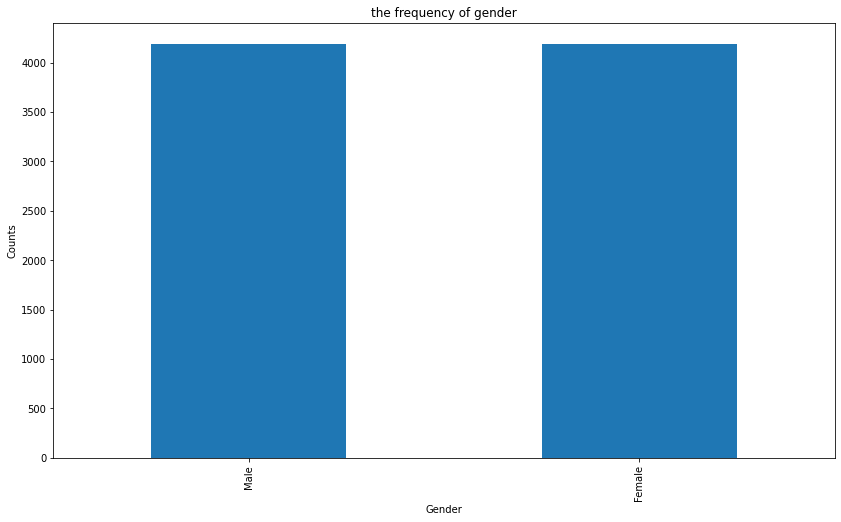

In [ ]:
ax = data['gender'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="the frequency of gender")
ax.set_ylabel('Counts')
ax.set_xlabel('Gender')
plt.show()

- The dataset is well balanced between males and females


## Age distribution of participants


Text(0, 0.5, 'Count')

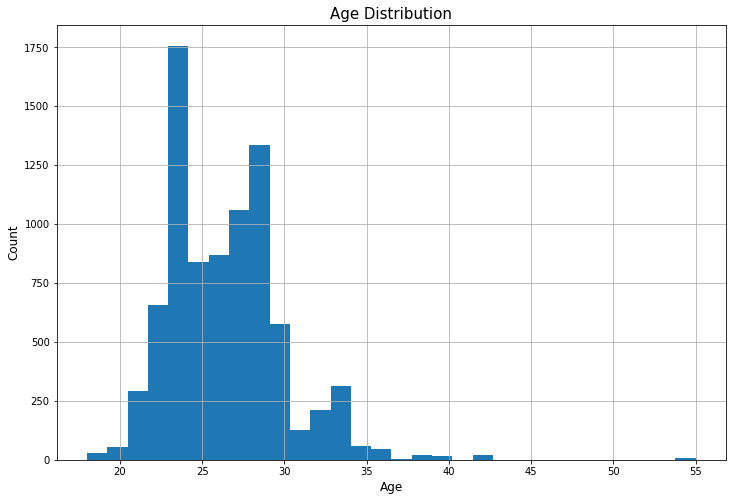

In [ ]:
ax = data.age.hist(bins=30, figsize=(12,8))
ax.set_title('Age Distribution', fontsize=15)
ax.set_xlabel('Age',fontsize=12)
ax.set_ylabel('Count', fontsize=12)


- Most of the people are between 21 and 30 years old

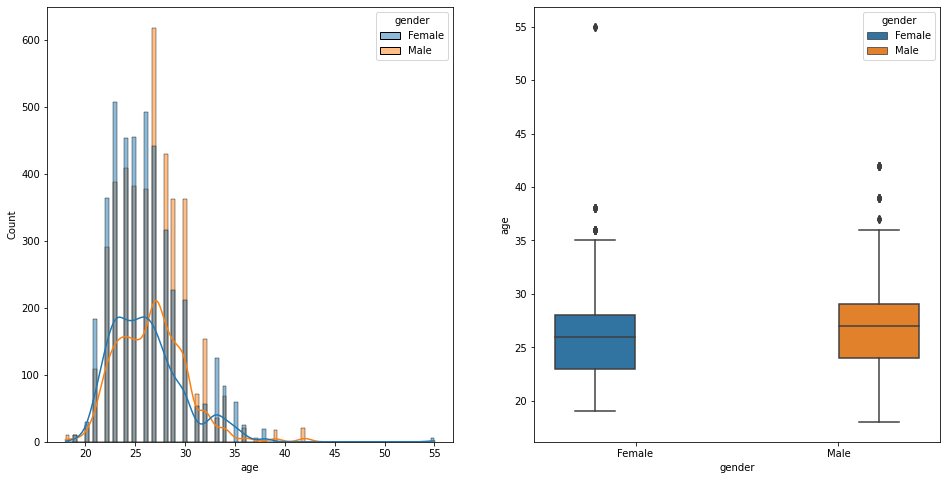

In [ ]:
figure, axes = plt.subplots(1, 2, figsize=(16,8))
sns.histplot(data=data, x="age",  hue="gender", ax=axes[0], kde=True);
sns.boxplot(data=data, x="gender", y="age", hue='gender', ax=axes[1]);


Female participants are in average younger than male participants




##Race distribution

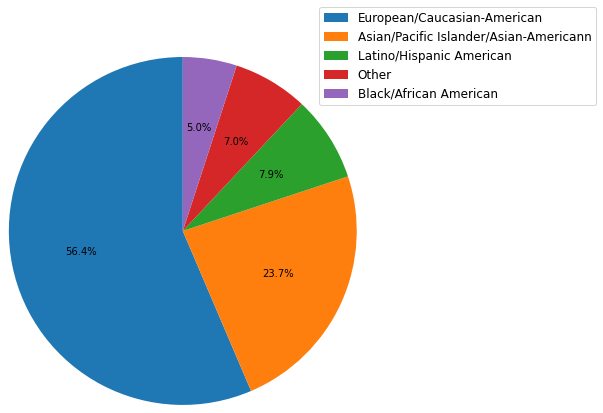

In [ ]:
races = data["race"].value_counts()

plt.figure()
plt.pie(races.values, labels=['','','','',''],
       autopct='%1.1f%%',
       startangle=90,
       radius=2
       )
plt.legend(labels = races.index, bbox_to_anchor=(1.1, 1.05), fontsize='large')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


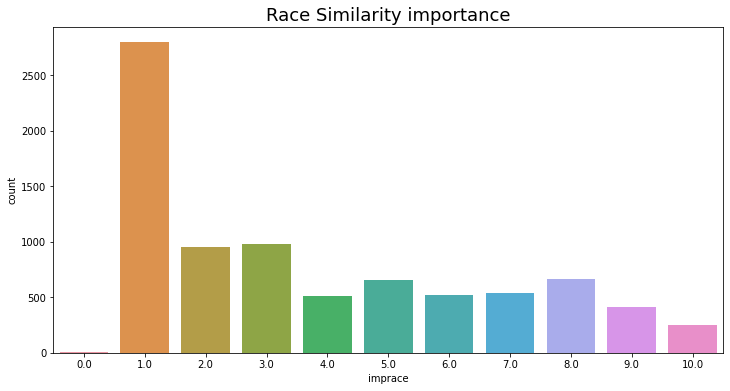

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Race Similarity importance" , fontsize=18)
sns.countplot(data['imprace'])
plt.show()

##imprace:How important is it to you (on a scale of 1-10) that a person you date be of the same racial/ethnic background?

 The most of people did not care about belonging to the same race  

##Religion


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


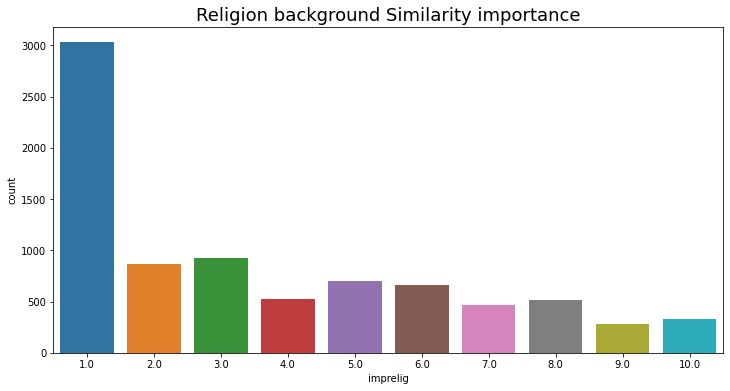

In [ ]:
#imprelig:How important is it to you (on a scale of 1-10) that a person you date be of the same religious background?
plt.figure(figsize=(12,6))
plt.title("Religion background Similarity importance" , fontsize=18)
sns.countplot(data['imprelig'])
plt.show()


Religion was not important for the majority of participants


##Goal

In [ ]:
data["goal"] = data["goal"].apply(lambda x: 'Seemed like a fun night out' if x == 1
                                  else 'To meet new people' if x == 2
                                  else 'To get a date' if x == 3
                                  else 'Looking for a serious relationship' if x == 4
                                  else 'To say I did it' if x == 5
                                   else 'Other'
                                         )

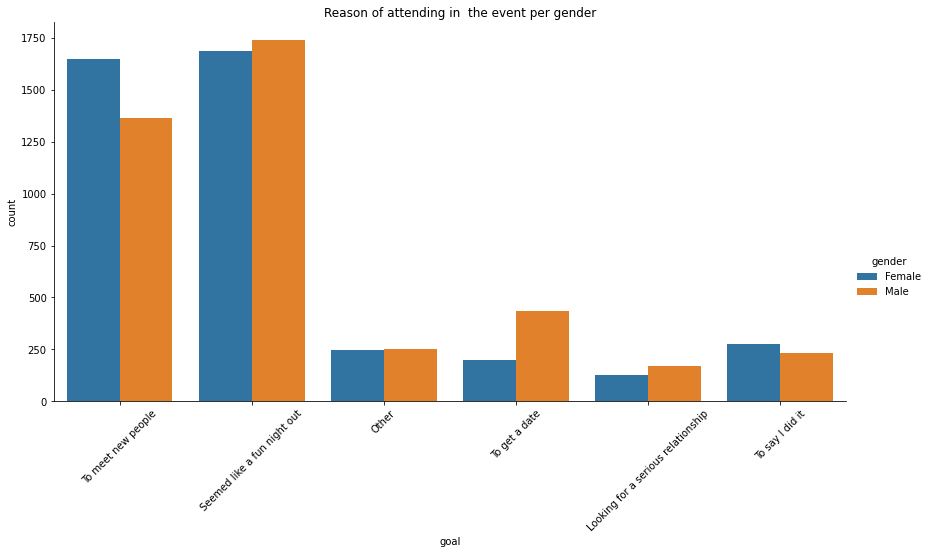

In [ ]:
ax = sns.catplot(data = data, x='goal', kind ='count', hue = 'gender', height = 6, aspect = 2)
ax.set_xticklabels(rotation=45)
ax.fig.suptitle('Reason of attending in  the event per gender', y = 1.01)
plt.show()


Most of participants came for a fun night out.

##What do people want from the opposite sex?

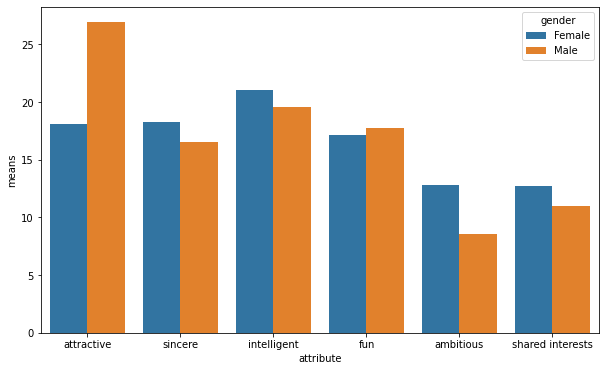

In [ ]:
lookfor = ["attr1_1", "sinc1_1", "intel1_1", "fun1_1", "amb1_1", "shar1_1"]
preferences_df = data.groupby(['gender'], as_index=False)[lookfor].mean()
preferences_df = pd.melt(preferences_df, id_vars="gender", var_name="attribute", value_name="means")
preferences_df['attribute'] = preferences_df['attribute']
preferences_df['attribute'].replace({"attr1_1" :'attractive' , "sinc1_1" : 'sincere',"intel1_1":'intelligent',"fun1_1":"fun","amb1_1":"ambitious","shar1_1":"shared interests"},inplace = True)
plt.figure(figsize=(10, 6))
sns.barplot(data=preferences_df, x='attribute', y='means', hue='gender');


On average, men valued women's attractiveness and intelligence.

 And women   are attracted to intelligent and  sincere

##What do people think the opposite sex wants from them?

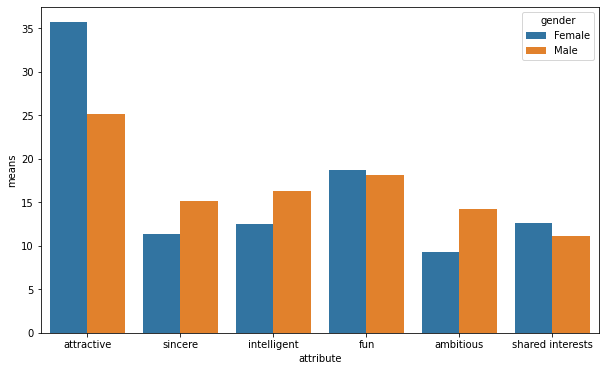

In [ ]:
lookfor2 = ["attr2_1", "sinc2_1", "intel2_1", "fun2_1", "amb2_1", "shar2_1"]
preferences_df2 = data.groupby(['gender'], as_index=False)[lookfor2].mean()
preferences_df2 = pd.melt(preferences_df2, id_vars="gender", var_name="attribute", value_name="means")
preferences_df2['attribute'] = preferences_df2['attribute']
preferences_df2['attribute'].replace({"attr2_1" :'attractive' , "sinc2_1" : 'sincere',"intel2_1":'intelligent',"fun2_1":"fun","amb2_1":"ambitious","shar2_1":"shared interests"},inplace = True)
plt.figure(figsize=(10, 6))
sns.barplot(data=preferences_df2, x='attribute', y='means', hue='gender');

Both men and women think the other person is looking for attraction

##Matching






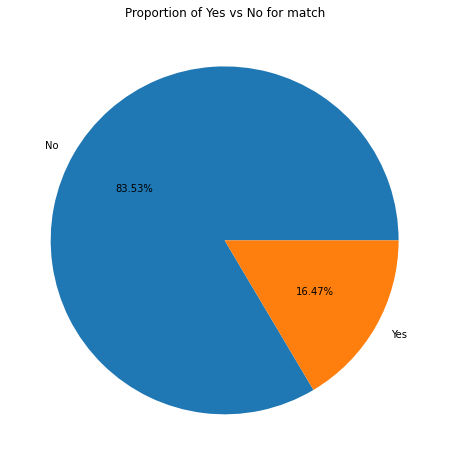

In [ ]:
match_df = data['match'].value_counts(dropna=False)
plt.figure(figsize=(12,8))
plt.pie(match_df.values, labels = match_df.index, autopct = "%.2f%%")
plt.title("Proportion of Yes vs No for match")
plt.show()

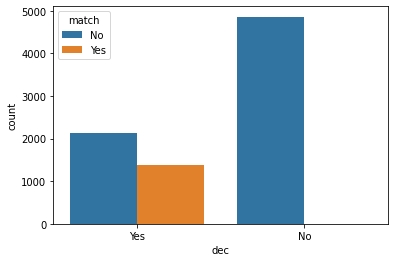

In [ ]:
sns.countplot(data = data, x ='dec', hue='match')


Positive decisions not always lead to a date.

Less than 50% of positive decisions lead to a date

In [ ]:
##Which variables are correlated with dating?

corr = df[df.columns].corr()
variables = list((corr[abs(corr["match"]) > 0.15]).index)
variables

['match',
 'dec_o',
 'attr_o',
 'sinc_o',
 'intel_o',
 'fun_o',
 'shar_o',
 'like_o',
 'prob_o',
 'dec',
 'attr',
 'sinc',
 'intel',
 'fun',
 'shar',
 'like',
 'prob',
 'them_cal',
 'num_in_3']

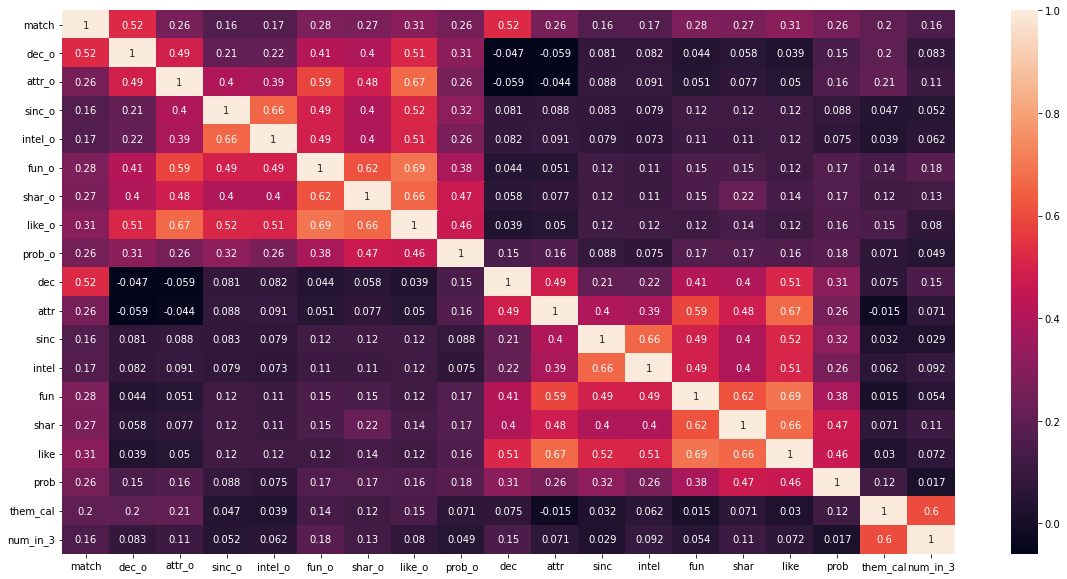

In [ ]:
corr_2 = df[variables].corr()
plt.figure(figsize = (20, 10))
sns.heatmap(data = corr_2, annot = True)

#Second Date

In [ ]:
df_second=df[df.date_3>0]


In [ ]:
data_second = df_second.groupby(['iid', 'gender']).agg({'you_call': 'sum', 'them_cal':'sum',
                                                         'date_3':'sum', 'match' : 'sum'}).reset_index()
data_second.dropna(inplace=True)

data_second

,iid,gender,you_call,them_cal,date_3,match
0,61,0,0.0,10.0,10.0,2
1,69,1,20.0,0.0,10.0,2
2,76,0,36.0,36.0,18.0,5
3,77,0,0.0,72.0,18.0,6
4,78,0,36.0,0.0,18.0,3
...,...,...,...,...,...,...
89,524,0,44.0,66.0,22.0,14
90,526,0,0.0,22.0,22.0,2
91,537,1,44.0,22.0,22.0,2
92,545,1,22.0,22.0,22.0,2


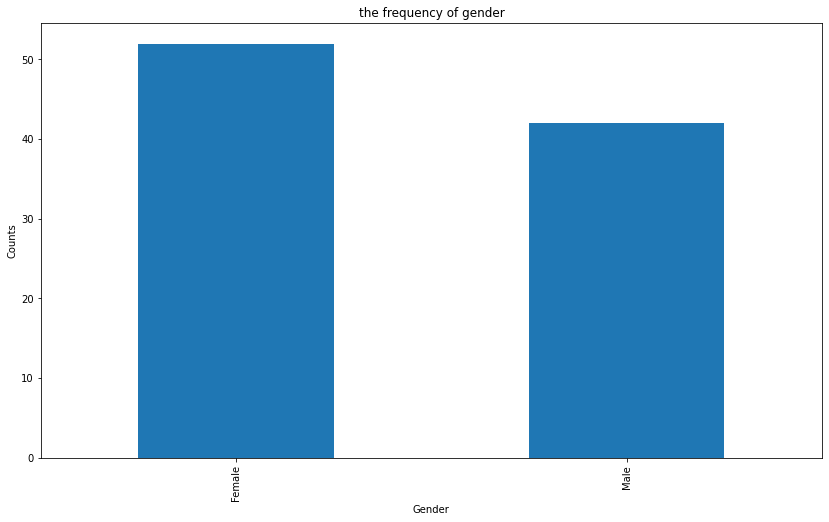

In [ ]:
data_second['gender'] = data_second['gender'].map({ 0 : "Female", 1 : "Male"})

ax = data_second['gender'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="the frequency of gender")
ax.set_ylabel('Counts')
ax.set_xlabel('Gender')
plt.show()

Women go on second dates more often than men

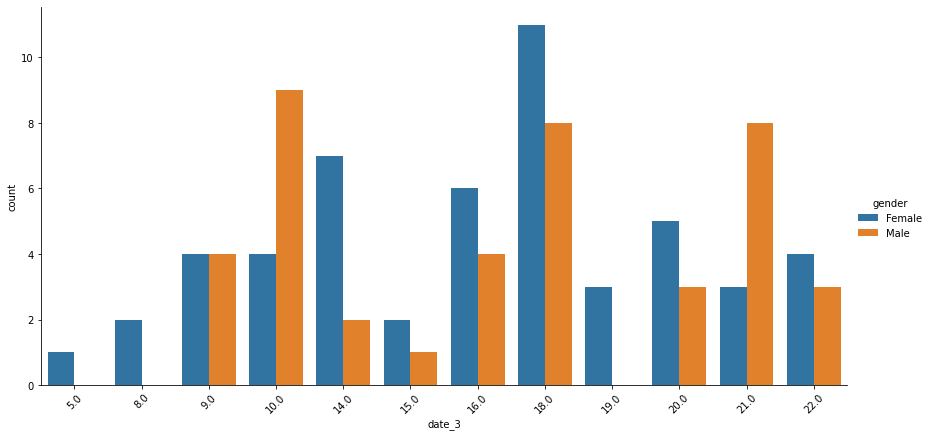

In [ ]:
ax = sns.catplot(data = data_second, x='date_3', kind ='count', hue = 'gender', height = 6, aspect = 2)
ax.set_xticklabels(rotation=45)
plt.show()



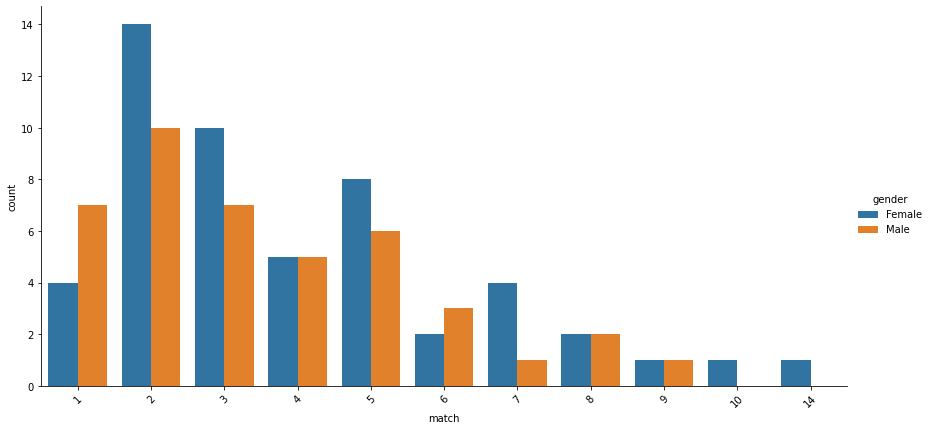

In [ ]:
ax = sns.catplot(data = data_second, x='match', kind ='count', hue = 'gender', height = 6, aspect = 2)
ax.set_xticklabels(rotation=45)
plt.show()

In [30]:
list_of_values=data_second[data_second['match']>1].iid.tolist()

print(f'Only {len(list_of_values)} of people find more than 1 match.')

Only 83 of people find more than 1 match.
